# DJ Koze: Auto DJ Mix Generator

In [ ]:
#conda install -c conda-forge librosa
#!pip install pydub
#!pip install tinytag
#!pip install spotipy --upgrade

In [1]:
import os
from tinytag import TinyTag
import librosa 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 60)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1) Obtain Metadata of the Track Inventory

- Use tinytag and spotify API (via spotipy)to collect metata of the tracks


In [4]:
audio_files = os.listdir('/home/dcpjungwoo/Project_5/Music/')
len(audio_files)

1653

In [5]:
tag = TinyTag.get('/home/dcpjungwoo/Project_5/Music/Rampa Feat. WhoMadeWho - Tell Me Are We [Innervisions].mp3')
tag

{'filesize': 16680547, 'album': 'They Will EP', 'albumartist': 'Rampa, WhoMadeWho', 'artist': 'Rampa Feat. WhoMadeWho', 'audio_offset': 144910, 'bitrate': 320.0, 'channels': 2, 'comment': '3A - 6', 'composer': None, 'disc': None, 'disc_total': None, 'duration': 413.5056387172905, 'genre': 'House', 'samplerate': 44100, 'title': 'Tell Me Are We', 'track': '3', 'track_total': '4', 'year': '2019'}

In [16]:
# Accessing Spotipy API

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
client_id = '1508bfcae65748c2898651757d8f5d72'
client_secret = '1198ecc3c70543b9808fbf46a80f2916'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [36]:
def metadata(path):
    audio_files = os.listdir(path)
    headers = (['artist', 'title', 'genre','tempo','key','mode','danceability','energy','speechiness','loudness',
                'acousticness','instrumentalness','liveness','valence'])
    audio_list = []
    for file in audio_files:
        # tinytag for artist, title, genre
        try:
            tag = TinyTag.get(path + file) 
            artist = tag.artist
            title = tag.title
            genre = tag.genre
        except:
            print('tinytag error: ' + file)
            continue
        
        # spotipy for other metadata
        try:
            track_id = sp.search(q='artist:' + artist + ' track:' + title, type='track')
            danceability = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['danceability']
            energy = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['energy']
            key = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['key']
            mode = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['mode']
            speechiness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['speechiness']
            loudness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['loudness']
            acousticness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['acousticness']
            instrumentalness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['instrumentalness']
            liveness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['liveness']
            valence = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['valence']
            tempo = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['tempo']
        except:
            title_strip = title.split('(')[0]
            try:
                track_id = sp.search(q='artist:' + artist + ' track:' + title_strip, type='track')
                danceability = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['danceability']
                energy = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['energy']
                key = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['key']
                mode = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['mode']
                speechiness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['speechiness']
                loudness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['loudness']
                acousticness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['acousticness']
                instrumentalness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['instrumentalness']
                liveness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['liveness']
                valence = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['valence']
                tempo = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['tempo']
            except:
                try:
                    title_strip = title.split('] ')[1]
                except:
                    title_strip = title.split('] ')[0]
                try:
                    track_id = sp.search(q='artist:' + artist + ' track:' + title_strip, type='track')
                    danceability = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['danceability']
                    energy = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['energy']
                    key = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['key']
                    mode = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['mode']
                    speechiness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['speechiness']
                    loudness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['loudness']
                    acousticness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['acousticness']
                    instrumentalness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['instrumentalness']
                    liveness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['liveness']
                    valence = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['valence']
                    tempo = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['tempo']
                except:
                    try:
                        title_strip = title.split('] ')[1]
                        title_strip = title_strip.split('(')[0]
                    except:
                        title_strip = title.split('] ')[0]
                    try:
                        track_id = sp.search(q='artist:' + artist + ' track:' + title_strip, type='track')
                        danceability = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['danceability']
                        energy = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['energy']
                        key = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['key']
                        mode = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['mode']
                        speechiness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['speechiness']
                        loudness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['loudness']
                        acousticness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['acousticness']
                        instrumentalness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['instrumentalness']
                        liveness = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['liveness']
                        valence = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['valence']
                        tempo = sp.audio_features(track_id['tracks']['items'][0]['uri'])[0]['tempo']    
                    except:
                        print('spotipy error: ' + file)
                        danceability = np.nan
                        energy = np.nan
                        key = np.nan
                        mode = np.nan
                        speechiness = np.nan
                        loudness = np.nan
                        acousticness = np.nan
                        instrumentalness = np.nan
                        liveness = np.nan
                        valence = np.nan
                        tempo = np.nan
                
        # package into a dictionary
        audio_dict = dict(zip(headers,[artist, title, genre, tempo, key, mode, danceability, energy, speechiness, loudness,
                acousticness, instrumentalness, liveness, valence ]))
        audio_list.append(audio_dict)

    return pd.DataFrame(audio_list)

In [37]:
music_df = metadata('/home/dcpjungwoo/Project_5/Music/')
music_df

spotipy error: Raffa FL - Hot For You (Ashley Wild Remix).mp3
spotipy error: Dast (Italy) - Simposio (Original Mix) [Suara].mp3
spotipy error: Danny Tenaglia, Layton Giordani - Live Again (Original Mix) [Drumcode].mp3
spotipy error: Jan Ritter, Amigow - Far Away (Original Mix) [Reload Black Label].mp3
spotipy error: Guy Gerber & Puff Daddy - Angels (Original Mix).mp3
retrying after...2secs
spotipy error: Pig&Dan - Growler [Diynamic].mp3
spotipy error: Glos feat VII Circle & Blazej Malinowski - Twenty-Seven Stabs [Flyance Records   ].mp3
spotipy error: Adana_Twins_-Strange_Fuli_Bootleg_.mp3
spotipy error: Flowers & Sea Creatures - The Very Next Day feat. Wrong Jeremy (Adriatique Remix) [My Favorite Robot Records].mp3
spotipy error: PRZ & Rapha - JV (Original Mix) [Parallax].mp3
retrying after...4secs
spotipy error: Russell (IE) - Warcall (Original Mix) [Rukus].mp3
retrying after...5secs
spotipy error: Marc_DePulse_feat_Cari_Golden-Animal_Original_Mix_.mp3
spotipy error: Julian_Jeweil_-D

retrying after...1secs
spotipy error: Just Her Ft. Kieran Fowkes - Let Myself Go.mp3
spotipy error: Pig&Dan - The Earth (Shall Ocin Remix) [ELEVATE].mp3
retrying after...3secs
spotipy error: Cristoph - Feel feat Jem Cooke (Original Mix) [Pryda Presents].mp3
spotipy error: Miss Kittin, Dubfire - Exit (The Hacker Remix) [SCI+TEC].mp3
spotipy error: 07. Josh Wink - Synodic Period.mp3
spotipy error: Guy Gerber & Puff Daddy - Broken Windows (Original Mix).mp3
spotipy error: Red Axes - Kalacol feat. Yuli Vainshtein  [Life And Death].mp3
retrying after...2secs
spotipy error: Ka One & St-Sene - Motion.mp3
spotipy error: Astro Buhloone - Forever (12 - ASTR001).mp3
spotipy error: Swayzak, Maceo Plex - 5th Dimensional Groove (Original Mix) [Ellum].mp3
retrying after...2secs
spotipy error: Vinyl Speed ADJust - Stretch Souls [Visionquest].mp3
retrying after...4secs
spotipy error: Guy Gerber & Puff Daddy - Never Walk Alone (Original Mix).mp3
spotipy error: Cheric & Amin - Remember The Mirage.mp3
spo

retrying after...1secs
retrying after...5secs
spotipy error: Ryan McCray - Culture Vol.1 EP - 03 Quad B (Original Mix).mp3
spotipy error: Mihalis Safras, Dennis Cruz - Fabulous (Dennis Cruz Remix) [Material].mp3
spotipy error: Piem & Yamil - The End (Original Mix) [Glasgow Underground].mp3
spotipy error: Carl Cox - Finder (Carl Cox Remix).mp3
retrying after...1secs
tinytag error: Other
spotipy error: Horror_Inc_-Jhator.mp3
retrying after...5secs
retrying after...4secs
spotipy error: Kollektiv_Turmstrasse-Last_Day_David_August_Revision.mp3
retrying after...5secs
spotipy error: UNDO - AutAmmatas (Inigo Vontier remix) [Factor City].mp3
spotipy error: Luigi Madonna & Roberto Capuano - Midfield (Original Mix) [Second State Audio].mp3
spotipy error: I_Hate_Models_-_Daydream_ARTS020-Vubey.mp3
spotipy error: Kasst - Lost in Paris (Steaward Remix) [Steaward recordings].mp3
spotipy error: Kellerkind feat. Sven - Shakti Pan [Stil Vor Talent].mp3
spotipy error: Control 33 (Original Mix).mp3
spotip

spotipy error: 11331613_Reveries_Of_The_Solitary_Walker_Original_Mix.mp3
spotipy error: Glos feat VII Circle & Blazej Malinowski - Twenty-Seven Stabs (Blazej Malinowski Remix) [Flyance Records   ].mp3
spotipy error: Recondite - Nock.mp3
spotipy error: Olivier Giacomotto, Noir - Reste (Raxon Remix) [Tronic].mp3
spotipy error: Denis Horvat - Lodi [UNRELEASED].mp3
spotipy error: Premiere Ka One & St-Sene - I Want [Normandy Records].mp3
retrying after...1secs
retrying after...4secs
spotipy error: Guy Gerber & Puff Daddy - Let Go (Original Mix).mp3
retrying after...4secs
retrying after...4secs
spotipy error: Matador - Finder (Matador Remix Edit).mp3
spotipy error: Animal Holocaust - Only Power Can Rules [MSNR003].mp3
spotipy error: David_Alvarado_-Fractured.mp3
retrying after...4secs
spotipy error: KAS_ST - Nepal (Original Mix) [Materia].mp3
spotipy error: Miles Sagnia - Perseverence feat. Kas_st (Kas_st Remix) [Flyance Records].mp3
spotipy error: Tim_Engelhardt_-Vega_Original_Mix_.mp3
spot

,artist,title,genre,tempo,key,mode,danceability,energy,speechiness,loudness,acousticness,instrumentalness,liveness,valence
0,John P,[2] Bacum (Original Mix),5.04_Secret Weapons,126.995,9.000,1.000,0.636,0.791,0.037,-10.648,0.032,0.927,0.115,0.068
1,Jay Lumen,[2-3] Balance (Original Mix),5.01_Fun Dark,128.001,6.000,0.000,0.760,0.927,0.079,-7.898,0.004,0.862,0.242,0.429
2,Agents Of Time,[2] Dance Impulse (Original Mix),6.01_Afterlife,126.020,7.000,1.000,0.786,0.805,0.050,-10.795,0.003,0.859,0.320,0.368
3,Vhyce,Say We Will (feat. Wolfgang Valbrun) (Titeknot...,Indie Dance / Nu Disco,121.972,9.000,0.000,0.755,0.650,0.127,-5.964,0.026,0.000,0.062,0.388
4,Mathame,[2] 22,6.01_Afterlife,127.011,5.000,0.000,0.864,0.444,0.110,-12.561,0.014,0.862,0.067,0.224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,Ilario Alicante & Delete,Going Straight to Caracas (Original Mix),5.02_Dubfire,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1647,PAX,Electric Feel (Extended Mix),1.02_Mood Light,122.989,8.000,1.000,0.764,0.930,0.057,-8.228,0.002,0.826,0.078,0.137
1648,Keith Carnal,[2-3] Justified Means,7.03,131.010,7.000,1.000,0.662,0.643,0.041,-11.973,0.026,0.929,0.111,0.038
1649,"Kas:st, Escape To Mars",Desolation (Escape To Mars Remix),7.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [42]:
import pickle

with open('music_df.pkl', 'wb') as picklefile:
    pickle.dump(music_df, picklefile)

In [4]:
with open("music_df.pkl", 'rb') as picklefile: 
    music_df = pickle.load(picklefile)

## 2) Convert MP3 to Chromgram and Spectrogram

- Use librosa to extract chromagrams and spectrograms for beginning/ending and middle sections of the tracks, repectively
- Mashability: Find cosine similarity btw Track A's intro chromagram and Track B's ending chromagram
- Similar Texture: Find consine similarity btw Track A's and Track B's middle spectrogram (2 min avg)

In [2]:
import numpy as np
import librosa.display

In [7]:
def create_save_chroma(path):
    audio_files = os.listdir(path)
    for file in audio_files:
        try:
            tag = TinyTag.get(path + file)    
        except:
            print('tinytag error: ' + file)
            continue
 
        # create intro chromagram
        y, sr = librosa.load(path + file, offset = tag.duration/6, duration = 30)
        S = np.abs(librosa.stft(y, n_fft = 2048))
        chroma = librosa.feature.chroma_stft(S=S, sr=sr)
        librosa.display.specshow(chroma)
        plt.tight_layout()

        #save intro chromagram
        name = file.split('.mp3')[0]
        output_file = "Chromagram/" + tag.artist + "_" + tag.title + "_intro.png"
        plt.savefig(output_file, transparent = True, pad_inches = 0.0)
        plt.close()

        # create ending chromagram
        y, sr = librosa.load(path + file, offset = tag.duration/6*4.5, duration = 30)
        S = np.abs(librosa.stft(y, n_fft = 2048))
        chroma = librosa.feature.chroma_stft(S=S, sr=sr)
        librosa.display.specshow(chroma)
        plt.tight_layout()

        #save iending chromagram
        name = file.split('.mp3')[0]
        output_file = "Chromagram/" + tag.artist + "_" + tag.title + "_ending.png"
        plt.savefig(output_file, transparent = True, pad_inches = 0.0)
        plt.close()


In [32]:
create_save_chroma('/home/dcpjungwoo/Project_5/Music/')

tinytag error: Other
tinytag error: Test


In [8]:
files = os.listdir('/home/dcpjungwoo/Project_5/Spectrogram')

spectro_files = []
for i in files:
    a = i.split('_')[0] + '_' +i.split('_')[1]
    spectro_files.append(a)

In [12]:
def create_save_spectro(path):
    audio_files = os.listdir(path)
    for file in audio_files:
        try:
            tag = TinyTag.get(path + file)    
        except:
            print('tinytag error: ' + file)
            continue
        
        try:
            if tag.artist + '_' + tag.title not in spectro_files:
                # create middle spectro - 1
                y, sr = librosa.load(path + file, offset = tag.duration/3, duration = 30)
                S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
                S_dB = librosa.power_to_db(S, ref=np.max)
                librosa.display.specshow(S_dB, sr=sr, fmax=8000)
                plt.tight_layout()

                #save middle spectro - 1
                output_file = "Spectrogram/" + tag.artist + "_" + tag.title + "_1.png"
                plt.savefig(output_file, transparent = True, pad_inches = 0.0)
                plt.close()

                # create middle spectro - 2
                y, sr = librosa.load(path + file, offset = tag.duration/3+30, duration = 30)
                S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
                S_dB = librosa.power_to_db(S, ref=np.max)
                librosa.display.specshow(S_dB, sr=sr, fmax=8000)
                plt.tight_layout()

                #save imiddle spectro - 2
                output_file = "Spectrogram/" + tag.artist + "_" + tag.title + "_2.png"
                plt.savefig(output_file, transparent = True, pad_inches = 0.0)
                plt.close()

                # create middle spectro - 3
                y, sr = librosa.load(path + file, offset = tag.duration/3+60, duration = 30)
                S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
                S_dB = librosa.power_to_db(S, ref=np.max)
                librosa.display.specshow(S_dB, sr=sr, fmax=8000)
                plt.tight_layout()

                #save middle spectro - 3
                output_file = "Spectrogram/" + tag.artist + "_" + tag.title + "_3.png"
                plt.savefig(output_file, transparent = True, pad_inches = 0.0)
                plt.close()

                # create middle spectro - 4
                y, sr = librosa.load(path + file, offset = tag.duration/3+90, duration = 30)
                S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
                S_dB = librosa.power_to_db(S, ref=np.max)
                librosa.display.specshow(S_dB, sr=sr, fmax=8000)
                plt.tight_layout()

                #save middle spectro - 4
                output_file = "Spectrogram/" + tag.artist + "_" + tag.title +"_4.png"
                plt.savefig(output_file, transparent = True, pad_inches = 0.0)
                plt.close() 
        except:
            print('spectro error: ' + file)
            continue

In [13]:
create_save_spectro('/home/dcpjungwoo/Project_5/Music/')

tinytag error: Other
spectro error: 4- Vespa.mp3
tinytag error: Test
spectro error: Lewis Fautzi - Psychopath (Original Mix) [Polegroup].mp3
spectro error: Cleric & Setaoc Mass - Exploration X [Clergy].mp3


## 3) Feature Extraction from Chromagrams/Spectrograms

- Transfer learning with VGG16 to extract features vectors
- PCA to further reduce dimensionality of the feature vectors

1) Use pre-trained convolutional neural network, VGG16 (i.e. transfer learning) to extract feature vectors

In [4]:
import keras
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False, input_shape = (432, 288, 3))

Using TensorFlow backend.


In [5]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 432, 288, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 432, 288, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 432, 288, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 216, 144, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 216, 144, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 216, 144, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 108, 72, 128)      0     

2) Extract and store each images to feature vectors so that you just need to run conv_base once. Also, using ImageDataGenerator to run 20 images at a time to fit the computation within RAM

In [6]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 13, 9, 512)) #based on the last dimension from conv_base summary
    file_names = []
    generator = datagen.flow_from_directory(
        directory,
        target_size=(432, 288), # make all images into a consistant size
        batch_size=batch_size,
        class_mode= None,
        shuffle = False) 
    i = 0
    for inputs_batch in generator:
        features_batch = conv_base.predict(inputs_batch) #array of numbers that represents extracted features thru conv_base
        features[i * batch_size : (i + 1) * batch_size] = features_batch # adding feature vectors
        
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, generator.filenames

In [8]:
base_dir = '/home/dcpjungwoo/Project_5/'
chroma_dir = os.path.join(base_dir, 'Chroma') 

chroma_features, chroma_filenames = extract_features(chroma_dir, 3280)

Found 3280 images belonging to 1 classes.


In [9]:
import pickle

with open('chroma_features.pkl', 'wb') as picklefile:
    pickle.dump(chroma_features, picklefile)

In [10]:
with open('chroma_filenames.pkl', 'wb') as picklefile:
    pickle.dump(chroma_filenames, picklefile)

In [11]:
base_dir = '/home/dcpjungwoo/Project_5/'
spectro_dir = os.path.join(base_dir, 'Spectro') 

spectro_features, spectro_filenames = extract_features(spectro_dir, 6552)

Found 6552 images belonging to 1 classes.


In [12]:
with open('spectro_features.pkl', 'wb') as picklefile:
    pickle.dump(spectro_features, picklefile)

In [87]:
with open('spectro_filenames.pkl', 'wb') as picklefile:
    pickle.dump(spectro_filenames, picklefile)

3) Flatten the feature dimension

In [43]:
chroma_features = np.reshape(chroma_features, (3280, 13 * 9 * 512))
spectro_features = np.reshape(spectro_features, (6552, 13 * 9 * 512))

In [208]:
len(chroma_features[1])

59904

In [45]:
spectro_features

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

4) Separate chromagram features btw intro and ending

In [81]:
headers = ['artist', 'title', 'part']
dict_list = []

for i in chroma_filenames:
    filename = i.split('.png')[0].split('/')[1]
    artist = filename.split('_')[0]
    title = filename.split('_')[1]
    part = filename.split('_')[2]
    dict_list.append(dict(zip(headers, [artist, title, part])))

chroma_df = pd.DataFrame(dict_list)
chroma_df['features'] = list(chroma_features)
chroma_df

,artist,title,part,features
0,"&ME, Rampa, Adam Port",[1-2] Muyè (Black Coffee Remix),ending,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
1,"&ME, Rampa, Adam Port",[1-2] Muyè (Black Coffee Remix),intro,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
2,"&ME, Rampa, Adam Port",[2] You Are Safe (Solomun Remix),ending,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
3,"&ME, Rampa, Adam Port",[2] You Are Safe (Solomun Remix),intro,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
4,&ME,Avalon,ending,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
...,...,...,...,...
3275,Âme,[2-3] Blind Eye feat. Planningtorock (Original...,intro,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
3276,Âme,[2] Queen Of Toys (Original Mix),ending,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
3277,Âme,[2] Queen Of Toys (Original Mix),intro,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
3278,一愀渀搀甀,Nandu - Glömde feat. Tyra (Love Over Entropy R...,ending,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."


In [82]:
chroma_df_intro = chroma_df[chroma_df.part == 'intro']
chroma_df_ending = chroma_df[chroma_df.part == 'ending']

In [86]:
# Converting pandas features column into 2D numpy array
from functools import reduce

chroma_features_intro = reduce(lambda x, y: np.vstack((x,y)), chroma_df_intro['features'])
chroma_features_ending = reduce(lambda x, y: np.vstack((x,y)), chroma_df_ending['features'])

In [88]:
with open('chroma_features_intro.pkl', 'wb') as picklefile:
    pickle.dump(chroma_features_intro, picklefile)

In [89]:
with open('chroma_features_ending.pkl', 'wb') as picklefile:
    pickle.dump(chroma_features_ending, picklefile)

5) Taking average of spectrograms

In [47]:
spectro_filenames

['Spectrogram/&ME, Rampa, Adam Port_[1-2] Muyè (Black Coffee Remix) _1.png',
 'Spectrogram/&ME, Rampa, Adam Port_[1-2] Muyè (Black Coffee Remix) _2.png',
 'Spectrogram/&ME, Rampa, Adam Port_[1-2] Muyè (Black Coffee Remix) _3.png',
 'Spectrogram/&ME, Rampa, Adam Port_[1-2] Muyè (Black Coffee Remix) _4.png',
 'Spectrogram/&ME, Rampa, Adam Port_[2] You Are Safe (Solomun Remix) _1.png',
 'Spectrogram/&ME, Rampa, Adam Port_[2] You Are Safe (Solomun Remix) _2.png',
 'Spectrogram/&ME, Rampa, Adam Port_[2] You Are Safe (Solomun Remix) _3.png',
 'Spectrogram/&ME, Rampa, Adam Port_[2] You Are Safe (Solomun Remix) _4.png',
 'Spectrogram/&ME_Avalon_1.png',
 'Spectrogram/&ME_Avalon_2.png',
 'Spectrogram/&ME_Avalon_3.png',
 'Spectrogram/&ME_Avalon_4.png',
 'Spectrogram/&ME_The Rapture_1.png',
 'Spectrogram/&ME_The Rapture_2.png',
 'Spectrogram/&ME_The Rapture_3.png',
 'Spectrogram/&ME_The Rapture_4.png',
 'Spectrogram/&ME_[2-3] Woods_1.png',
 'Spectrogram/&ME_[2-3] Woods_2.png',
 'Spectrogram/&M

In [48]:
headers = ['artist', 'title']
dict_list = []

for i in spectro_filenames:
    filename = i.split('/')[1]
    artist = filename.split('_')[0]
    title = filename.split('_')[1]
    dict_list.append(dict(zip(headers, [artist, title])))

spectro_df = pd.DataFrame(dict_list)

In [49]:
spectro_df['features'] = list(spectro_features)

In [56]:
spectro_df_agg = spectro_df.groupby(['artist','title']).features.apply(lambda x: np.mean(x)).reset_index()

In [69]:
spectro_df_agg['features']

0       [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
1       [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
2       [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
3       [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
4       [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
                              ...                        
1633    [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
1634    [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
1635    [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
1636    [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
1637    [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
Name: features, Length: 1638, dtype: object

In [70]:
# Converting pandas features column into 2D numpy array
spectro_features_agg = reduce(lambda x, y: np.vstack((x,y)), spectro_df_agg['features'])

In [71]:
spectro_features_agg

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [90]:
with open('spectro_features_agg.pkl', 'wb') as picklefile:
    pickle.dump(spectro_features_agg, picklefile)

5) Use PCA to reduce dimensionality

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 500)
pca_chroma_features_intro = pca.fit_transform(chroma_features_intro)

pca_3 = PCA(n_components= 500)

pca_chroma_features_ending = pca_3.fit_transform(chroma_features_ending)

pca_2 = PCA(n_components= 500)
pca_spectro_features = pca_2.fit_transform(spectro_features_agg)

In [96]:
def show_variance_explained_plots(pca):
    
    var_exp_array = pca.explained_variance_ratio_
    n_comps = var_exp_array.shape[0] 
    
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    
    ax[0].fill_between(range(n_comps), var_exp_array)
    ax[0].set_title('Variance Explained by Nth Principal Component')
    
    ax[1].fill_between(range(n_comps), np.cumsum(var_exp_array))
    ax[1].set_title('Cumulative Variance Explained by N Components')
    
    plt.show()

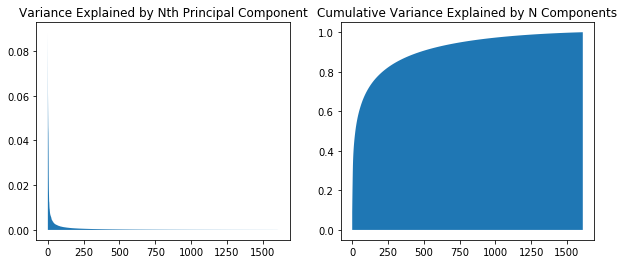

In [97]:
show_variance_explained_plots(pca)

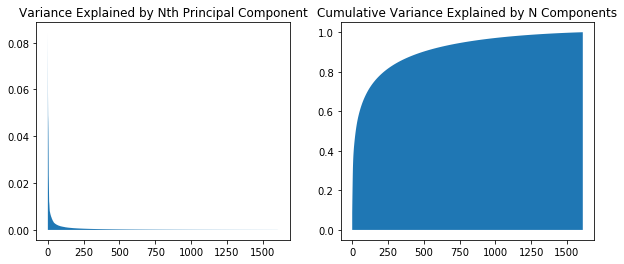

In [98]:
show_variance_explained_plots(pca_3)

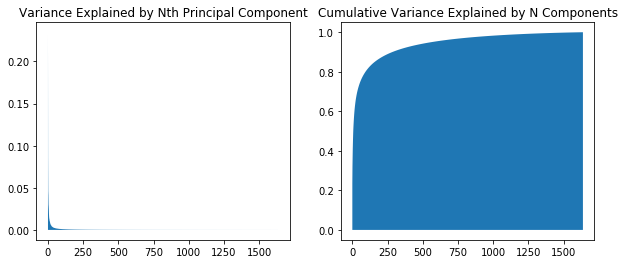

In [99]:
show_variance_explained_plots(pca_2)

6) Merge the feature vectors with other metadata in musid_df 

In [106]:
chroma_df_intro['pca_features_intro'] = list(pca_chroma_features_intro)
chroma_df_ending['pca_features_ending'] = list(pca_chroma_features_ending)
spectro_df_agg['pca_features_middle'] = list(pca_spectro_features)

In [109]:
chroma_df_intro['id'] = chroma_df_intro.artist + chroma_df_intro.title
chroma_df_ending['id'] = chroma_df_ending.artist + chroma_df_ending.title
spectro_df_agg['id'] = spectro_df_agg.artist + spectro_df_agg.title

In [112]:
music_df['id'] = music_df.artist + music_df.title

In [117]:
music_df = music_df[~(music_df.artist == '')] 

In [118]:
# merge feature vectors 

music_df = pd.merge(music_df, chroma_df_intro.loc[:,['id','pca_features_intro']],how = 'left', on = 'id')
music_df = pd.merge(music_df, chroma_df_ending.loc[:,['id','pca_features_ending']],how = 'left', on = 'id')
music_df = pd.merge(music_df, spectro_df_agg.loc[:,['id','pca_features_middle']],how = 'left', on = 'id')
music_df

,artist,title,genre,tempo,key,mode,danceability,energy,speechiness,loudness,acousticness,instrumentalness,liveness,valence,id,pca_features_intro,pca_features_ending,pca_features_middle
0,John P,[2] Bacum (Original Mix),5.04_Secret Weapons,126.995,9.000,1.000,0.636,0.791,0.037,-10.648,0.032,0.927,0.115,0.068,John P[2] Bacum (Original Mix),"[-2.418183752264464, 2.645782829702166, 1.2291...","[2.130762972822095, 5.776659175482549, -0.0548...","[7.729476152321495, 7.771623503648842, 2.97111..."
1,Jay Lumen,[2-3] Balance (Original Mix),5.01_Fun Dark,128.001,6.000,0.000,0.760,0.927,0.079,-7.898,0.004,0.862,0.242,0.429,Jay Lumen[2-3] Balance (Original Mix),"[-5.839118145536337, -4.511505750577054, -1.31...","[-8.131016943873918, -1.0521155744076067, -1.5...","[-5.345466708596023, 6.641429572545614, -0.009..."
2,Agents Of Time,[2] Dance Impulse (Original Mix),6.01_Afterlife,126.020,7.000,1.000,0.786,0.805,0.050,-10.795,0.003,0.859,0.320,0.368,Agents Of Time[2] Dance Impulse (Original Mix),"[-2.8844036114930964, -2.849577336249187, -4.5...","[-2.6302360529996927, -9.412703117589611, -6.8...","[-5.050179803925489, -3.0293634864618175, 1.60..."
3,Vhyce,Say We Will (feat. Wolfgang Valbrun) (Titeknot...,Indie Dance / Nu Disco,121.972,9.000,0.000,0.755,0.650,0.127,-5.964,0.026,0.000,0.062,0.388,VhyceSay We Will (feat. Wolfgang Valbrun) (Tit...,"[7.2929852164935145, -8.25681640477625, -1.422...","[8.720764122215316, -0.8561015200523422, 6.588...","[-5.83527324064693, -3.4136837288067463, -4.98..."
4,Mathame,[2] 22,6.01_Afterlife,127.011,5.000,0.000,0.864,0.444,0.110,-12.561,0.014,0.862,0.067,0.224,Mathame[2] 22,"[6.7870632115759, -6.70694146879739, -1.727749...","[9.76271297505865, -9.702886039034382, 2.92917...","[1.0854442865598153, -2.234674407623307, -0.01..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,Ilario Alicante & Delete,Going Straight to Caracas (Original Mix),5.02_Dubfire,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Ilario Alicante & DeleteGoing Straight to Cara...,"[-8.828588885920112, -6.17448350081109, -5.621...","[-8.727387043151278, -3.2595327401232126, 2.30...","[-4.5430242924244935, 7.74465366363991, 0.6284..."
1575,PAX,Electric Feel (Extended Mix),1.02_Mood Light,122.989,8.000,1.000,0.764,0.930,0.057,-8.228,0.002,0.826,0.078,0.137,PAXElectric Feel (Extended Mix),"[1.6771294218436863, -5.887328023769067, -4.94...","[-3.246549388194737, -7.3491231756509325, -1.3...","[-0.5858303340059071, -2.8403051168600277, -4...."
1576,Keith Carnal,[2-3] Justified Means,7.03,131.010,7.000,1.000,0.662,0.643,0.041,-11.973,0.026,0.929,0.111,0.038,Keith Carnal[2-3] Justified Means,"[-0.6693117368848183, -3.7578751414388734, -5....","[-0.13172272888066602, -3.2165929444264587, -3...","[18.69636917629169, 2.5096832950430015, -3.771..."
1577,"Kas:st, Escape To Mars",Desolation (Escape To Mars Remix),7.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"Kas:st, Escape To MarsDesolation (Escape To Ma...","[-3.885696500749199, 8.862552870056929, -0.195...","[-5.626208546804147, 5.827922775043678, -1.703...","[12.568593697941626, 7.6027850321908215, -0.03..."


## 4) Recommendation System

- Content-based filtering on BPM, Energy Level, Harmonic Key/Mode
- Musical Texture: Cosine similarity on spectrogram feature vectors
- Mashability: Cosine similarity on chromagram feature vectors

In [129]:
# remove Nan and make keymode column
music_df = music_df[~music_df['key'].isna()]
music_df['key'] = music_df['key'].apply(lambda x: str(int(x)))
music_df['mode'] = music_df['mode'].apply(lambda x: str(int(x)))
music_df['keymode'] = music_df['key'] + '-' + music_df['mode']

In [187]:
music_df = music_df[~music_df.pca_features_intro.isna()]

In [218]:
music_df

,artist,title,genre,tempo,key,mode,danceability,energy,speechiness,loudness,acousticness,instrumentalness,liveness,valence,id,pca_features_intro,pca_features_ending,pca_features_middle,keymode
0,John P,[2] Bacum (Original Mix),5.04_Secret Weapons,126.995,9,1,0.636,0.791,0.037,-10.648,0.032,0.927,0.115,0.068,John P[2] Bacum (Original Mix),"[-2.418183752264464, 2.645782829702166, 1.2291...","[2.130762972822095, 5.776659175482549, -0.0548...","[7.729476152321495, 7.771623503648842, 2.97111...",9-1
1,Jay Lumen,[2-3] Balance (Original Mix),5.01_Fun Dark,128.001,6,0,0.760,0.927,0.079,-7.898,0.004,0.862,0.242,0.429,Jay Lumen[2-3] Balance (Original Mix),"[-5.839118145536337, -4.511505750577054, -1.31...","[-8.131016943873918, -1.0521155744076067, -1.5...","[-5.345466708596023, 6.641429572545614, -0.009...",6-0
2,Agents Of Time,[2] Dance Impulse (Original Mix),6.01_Afterlife,126.020,7,1,0.786,0.805,0.050,-10.795,0.003,0.859,0.320,0.368,Agents Of Time[2] Dance Impulse (Original Mix),"[-2.8844036114930964, -2.849577336249187, -4.5...","[-2.6302360529996927, -9.412703117589611, -6.8...","[-5.050179803925489, -3.0293634864618175, 1.60...",7-1
3,Vhyce,Say We Will (feat. Wolfgang Valbrun) (Titeknot...,Indie Dance / Nu Disco,121.972,9,0,0.755,0.650,0.127,-5.964,0.026,0.000,0.062,0.388,VhyceSay We Will (feat. Wolfgang Valbrun) (Tit...,"[7.2929852164935145, -8.25681640477625, -1.422...","[8.720764122215316, -0.8561015200523422, 6.588...","[-5.83527324064693, -3.4136837288067463, -4.98...",9-0
4,Mathame,[2] 22,6.01_Afterlife,127.011,5,0,0.864,0.444,0.110,-12.561,0.014,0.862,0.067,0.224,Mathame[2] 22,"[6.7870632115759, -6.70694146879739, -1.727749...","[9.76271297505865, -9.702886039034382, 2.92917...","[1.0854442865598153, -2.234674407623307, -0.01...",5-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,Yagya,Rigning Einn,1.03_Mood Deep,109.840,6,1,0.357,0.219,0.032,-22.052,0.571,0.118,0.619,0.043,YagyaRigning Einn,"[11.001895725695263, 5.787071268217515, 5.7344...","[15.15951910827657, -3.264636563158849, 7.8413...","[5.377628977898939, -2.935136661134993, 1.6756...",6-1
1572,Jessica Diaz,Buhos (Chad Andrew Remix),8.02_Dawn Minimal,120.002,11,0,0.814,0.620,0.093,-9.400,0.000,0.891,0.078,0.130,Jessica DiazBuhos (Chad Andrew Remix),"[-9.279782038355927, -2.2242592187509445, 2.62...","[-10.240884236613661, -0.865079628961999, 1.72...","[-14.761786702406308, -0.26273012450128447, -1...",11-0
1573,A Sagittariun,The Pathway (Matrixxman Remix),7.04_Industrial,132.019,4,0,0.677,0.609,0.065,-10.317,0.004,0.842,0.156,0.359,A SagittariunThe Pathway (Matrixxman Remix),"[-4.033724217067599, -5.307123384792396, -9.58...","[-6.331027112655954, 1.638912445198153, 0.8414...","[-7.874647482775317, 9.346047405558428, 3.3230...",4-0
1575,PAX,Electric Feel (Extended Mix),1.02_Mood Light,122.989,8,1,0.764,0.930,0.057,-8.228,0.002,0.826,0.078,0.137,PAXElectric Feel (Extended Mix),"[1.6771294218436863, -5.887328023769067, -4.94...","[-3.246549388194737, -7.3491231756509325, -1.3...","[-0.5858303340059071, -2.8403051168600277, -4....",8-1


In [219]:
with open('music_df_2.pkl', 'wb') as picklefile:
    pickle.dump(music_df, picklefile)

In [4]:
with open("music_df_2.pkl", 'rb') as picklefile: 
    music_df = pickle.load(picklefile)

In [39]:
def harmonickey(keymode, df):
    if keymode == '0-1':
        return df[(df['keymode']== '0-1') | (df['keymode']== '5-1') | (df['keymode']== '7-1') | (df['keymode']== '9-0')]
    elif keymode == '1-1':
        return df[(df['keymode']== '1-1') | (df['keymode']== '6-1') | (df['keymode']== '8-1') | (df['keymode']== '10-0')]
    elif keymode == '2-1':
        return df[(df['keymode']== '2-1') | (df['keymode']== '7-1') | (df['keymode']== '9-1') | (df['keymode']== '11-0')]
    elif keymode == '3-1':
        return df[(df['keymode']== '3-1') | (df['keymode']== '8-1') | (df['keymode']== '10-1') | (df['keymode']== '0-0')]
    elif keymode == '4-1':
        return df[(df['keymode']== '4-1') | (df['keymode']== '9-1') | (df['keymode']== '11-1') | (df['keymode']== '1-0')]
    elif keymode == '5-1':
        return df[(df['keymode']== '5-1') | (df['keymode']== '10-1') | (df['keymode']== '0-1') | (df['keymode']== '2-0')]
    elif keymode == '6-1':
        return df[(df['keymode']== '6-1') | (df['keymode']== '11-1') | (df['keymode']== '1-1') | (df['keymode']== '3-0')]
    elif keymode == '7-1':
        return df[(df['keymode']== '7-1') | (df['keymode']== '0-1') | (df['keymode']== '2-1') | (df['keymode']== '4-0')]
    elif keymode == '8-1':
        return df[(df['keymode']== '8-1') |(df['keymode']== '1-1') | (df['keymode']== '3-1') | (df['keymode']== '5-0')]
    elif keymode == '9-1':
        return df[(df['keymode']== '9-1') | (df['keymode']== '2-1') | (df['keymode']== '4-1') | (df['keymode']== '6-0')]
    elif keymode == '10-1':
        return df[(df['keymode']== '10-1') | (df['keymode']== '3-1') | (df['keymode']== '5-1') | (df['keymode']== '7-0')]
    elif keymode == '11-1':
        return df[(df['keymode']== '11-1') | (df['keymode']== '4-1') | (df['keymode']== '6-1') | (df['keymode']== '8-0')]
    
    elif keymode == '0-0':
        return df[(df['keymode']== '0-0') | (df['keymode']== '5-0') | (df['keymode']== '7-0') | (df['keymode']== '3-1')]
    elif keymode == '1-0':
        return df[(df['keymode']== '1-0') | (df['keymode']== '6-0') | (df['keymode']== '8-0') | (df['keymode']== '4-1')]
    elif keymode == '2-0':
        return df[(df['keymode']== '2-0') | (df['keymode']== '7-0') | (df['keymode']== '9-0') | (df['keymode']== '5-1')]
    elif keymode == '3-0':
        return df[(df['keymode']== '3-0') | (df['keymode']== '8-0') | (df['keymode']== '10-0') | (df['keymode']== '6-1')]
    elif keymode == '4-0':
        return df[(df['keymode']== '4-0') | (df['keymode']== '9-0') | (df['keymode']== '11-0') | (df['keymode']== '7-1')]
    elif keymode == '5-0':
        return df[(df['keymode']== '5-0') | (df['keymode']== '10-0') | (df['keymode']== '0-0') | (df['keymode']== '8-1')]
    elif keymode == '6-0':
        return df[(df['keymode']== '6-0') | (df['keymode']== '11-0') | (df['keymode']== '1-0') | (df['keymode']== '9-1')]
    elif keymode == '7-0':
        return df[(df['keymode']== '7-0') | (df['keymode']== '0-0') | (df['keymode']== '2-0') | (df['keymode']== '10-1')]
    elif keymode == '8-0':
        return df[(df['keymode']== '8-0') | (df['keymode']== '1-0') | (df['keymode']== '3-0') | (df['keymode']== '11-1')]
    elif keymode == '9-0':
        return df[(df['keymode']== '9-0') | (df['keymode']== '2-0') | (df['keymode']== '4-0') | (df['keymode']== '0-1')]
    elif keymode == '10-0':
        return df[(df['keymode']== '10-0') | (df['keymode']== '3-0') | (df['keymode']== '5-0') | (df['keymode']== '1-1')]
    elif keymode == '11-0':
        return df[(df['keymode']== '11-0') | (df['keymode']== '4-0') | (df['keymode']== '6-0') | (df['keymode']== '2-1')]   

In [ ]:
# Content based filtering based on tempo, energy level, key/mode
def content_based_filter(artist_name, title_name):
    
    index = music_df[(music_df.artist == artist_name) & (music_df.title == title_name)].index[0]
    tempo = music_df.loc[index, 'tempo']
    energy = music_df.loc[index, 'energy']
    keymode = str(int(music_df.loc[index, 'key'])) + '-' + str(int(music_df.loc[index, 'mode']))
    
    df = music_df[(music_df.tempo >= tempo - 2.5)& (music_df.tempo < tempo + 2.5) & (music_df.energy >= energy *.85)& (music_df.energy < energy*1.15)]
    
    select_df = harmonickey(keymode, df)
    select_df.reset_index(drop=True, inplace = True)
    
    return select_df

In [41]:
# Developed a function to identify the closest track to follow.
# content_based_filtering > top 30 using cosine similarity on spectro > 1 track using cosine similarity on chorma

from sklearn.metrics import pairwise_distances

recommend_list = []
recommend_list_full = []

def recommend(artist, title):
    # find candidate tracks using bpm and keymode
    df = content_based_filter(artist, title)

    # narrow down the tracks to top 30 using spectrogram 
    d = pairwise_distances(list(df['pca_features_middle']), metric='cosine')
    index = df[(df.artist == artist) & (df.title == title)].index[0]

    ix_list = []
    for ix in d[index].argsort()[1:30]:
        ix_list.append(ix)

    df2 = df.iloc[ix_list, 0:20]
    df2.reset_index(drop = True, inplace = True)

    # find the closest track that is most mashable using chromagram
    d2 = pairwise_distances(list(df2.pca_features_intro), list(df[(df.artist == artist) & (df.title == title)].pca_features_ending), metric='cosine')
    
    for i in d2.argsort(axis=0):
        if (df2.iloc[i[0],0] + "_" + df2.iloc[i[0],1]) not in recommend_list:
            return df2.iloc[i[0],0:20]

In [47]:
# Developed a function to generate a playlist using recommended track as an input to find the following track

def djtracklist(artist, title):
    input_track = music_df[(music_df.artist == artist) & (music_df.title == title)].iloc[0]
    first_track = recommend(artist, title)
    
    global recommend_list
    global recommend_list_full
    
    recommend_list = [input_track.artist + "_" + input_track.title, first_track.artist + "_" + first_track.title]
    recommend_list_full = [input_track, first_track]
    
    for _ in range(13):
        current_track = recommend_list[-1]
        #print(current_track)
        following_track = recommend(current_track.split('_')[0], current_track.split('_')[1])
        #print(following_track)
        recommend_list.append(following_track.artist + "_" + following_track.title)
        #print(recommend_list)
        recommend_list_full.append(following_track)
     
    tracklist = pd.DataFrame(recommend_list_full)
    tracklist.reset_index(drop = True, inplace = True)

    return tracklist

In [48]:
djtracklist('Stephan Bodzin','Strand')

,artist,title,genre,tempo,key,mode,danceability,energy,speechiness,loudness,acousticness,instrumentalness,liveness,valence,id,pca_features_intro,pca_features_ending,pca_features_middle,keymode
0,Stephan Bodzin,Strand,6.01_Afterlife,122.001,11,1,0.727,0.820,0.0473,-11.369,0.022700,0.9150,0.1010,0.0785,Stephan BodzinStrand,"[-3.83915330402444, -6.127464023902051, 0.6073...","[-2.4405348446629427, -3.862374340518265, 4.58...","[-4.850975753604354, 2.541122964079661, 2.2005...",11-1
1,Meditation Tunnel,[2] Fire Fly (Red Axes Remix),3.02_Innervision House,120.001,4,1,0.642,0.899,0.0406,-8.331,0.003180,0.9060,0.0832,0.0512,Meditation Tunnel[2] Fire Fly (Red Axes Remix),"[-0.9514255046707614, -7.084687731459387, 10.9...","[9.277898258046315, -6.028401056315996, -1.541...","[8.174335034000116, -8.618895174703491, -0.112...",4-1
2,Fernando Olaya,The Cube (Original Mix),2.01_Progressive,121.006,1,0,0.691,0.822,0.0491,-10.904,0.010500,0.8550,0.1250,0.5380,Fernando OlayaThe Cube (Original Mix),"[6.021136726112931, -4.293535961766321, -1.702...","[-1.5959660381087266, -5.398704932486313, -1.9...","[6.039954786444362, -6.91307293649703, -4.0279...",1-0
3,Red Axes,Sun My Sweet Sun (Konstantin Sibold Afro Tech ...,3.02_Innervision House,121.001,8,0,0.818,0.798,0.0412,-8.761,0.027700,0.4340,0.1070,0.0439,Red AxesSun My Sweet Sun (Konstantin Sibold Af...,"[-6.236764619631186, -3.504130610477184, 6.637...","[4.639946461911547, 1.2496966852210423, 6.8827...","[5.005712864675093, -10.789522380896047, -1.85...",8-0
4,Will Saul,For Joanie,House,118.995,3,0,0.666,0.840,0.0458,-7.233,0.004940,0.6700,0.3060,0.7030,Will SaulFor Joanie,"[3.0441257785163764, -9.158841763445379, -6.01...","[4.042926870417958, -9.6703811223134, 2.808912...","[-0.2249577516008053, -4.42462394472116, -0.96...",3-0
5,Isolée,Pisco,3.02_Innervision House,120.020,10,0,0.801,0.826,0.0443,-10.808,0.006710,0.9030,0.0767,0.4960,IsoléePisco,"[0.8347177425481409, -7.00611835182613, -2.931...","[-6.37046445070636, -6.963004935479159, 4.0171...","[-6.392888173316999, -1.3040594359292519, 0.35...",10-0
6,Adryiano,Me and You and Her (Pitto's Groove Your Body R...,Deep House,120.022,5,0,0.788,0.856,0.0582,-9.037,0.145000,0.9240,0.0514,0.7620,AdryianoMe and You and Her (Pitto's Groove You...,"[-1.6894812346675407, -9.087885144366643, 0.51...","[0.010515754608928517, -6.496383443589229, 1.9...","[-7.542369122185523, -1.6201222975451053, -6.3...",5-0
7,Few Nolder,Clouds (Boso Reversion),3.02_Innervision House,120.003,10,0,0.806,0.840,0.0438,-7.378,0.005570,0.8580,0.0331,0.6570,Few NolderClouds (Boso Reversion),"[2.9209383652432535, 2.88137105049674, 0.38674...","[0.284047237039101, 4.46777260354769, 8.593900...","[-0.02046733778194679, -3.2866110725699538, -7...",10-0
8,&ME,The Rapture,3.01_Dixon/Solomun,120.018,10,0,0.802,0.886,0.0393,-7.676,0.000030,0.9020,0.0986,0.0774,&METhe Rapture,"[6.756911823352924, 13.689426686282873, 7.2064...","[5.823358697978905, 16.587507797839038, -1.040...","[9.380536467310899, -8.632896025270263, -2.234...",10-0
9,Adriatique,Soul Valley (Original Mix),3.01_Dixon/Solomun,121.996,10,0,0.801,0.858,0.0507,-9.681,0.000015,0.8870,0.0769,0.1960,AdriatiqueSoul Valley (Original Mix),"[-1.5699267849161718, 8.948149767510793, 7.939...","[-1.7654999888083698, 11.13748410157798, 5.121...","[6.596239383904549, -4.412839394510205, -2.076...",10-0
